# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [39]:
#imports
# Load pickled data
import pickle
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import tensorflow as tf
from tqdm import tqdm
from tensorflow.python.ops.variables import Variable

In [40]:
# TODO: fill this in based on where you saved the training and testing data
training_file = '../traffic-signs-data/train.p'
testing_file =  '../traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [41]:
### To start off let's do a basic data summary.

# TODO: number of training examples
n_train = X_train.shape

# TODO: number of testing examples
n_test = X_test.shape

# TODO: what's the shape of an image?
image_shape = X_train[0].shape

# TODO: how many classes are in the dataset
n_classes = y_train.shape

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = (39209, 32, 32, 3)
Number of testing examples = (12630, 32, 32, 3)
Image data shape = (32, 32, 3)
Number of classes = (39209,)


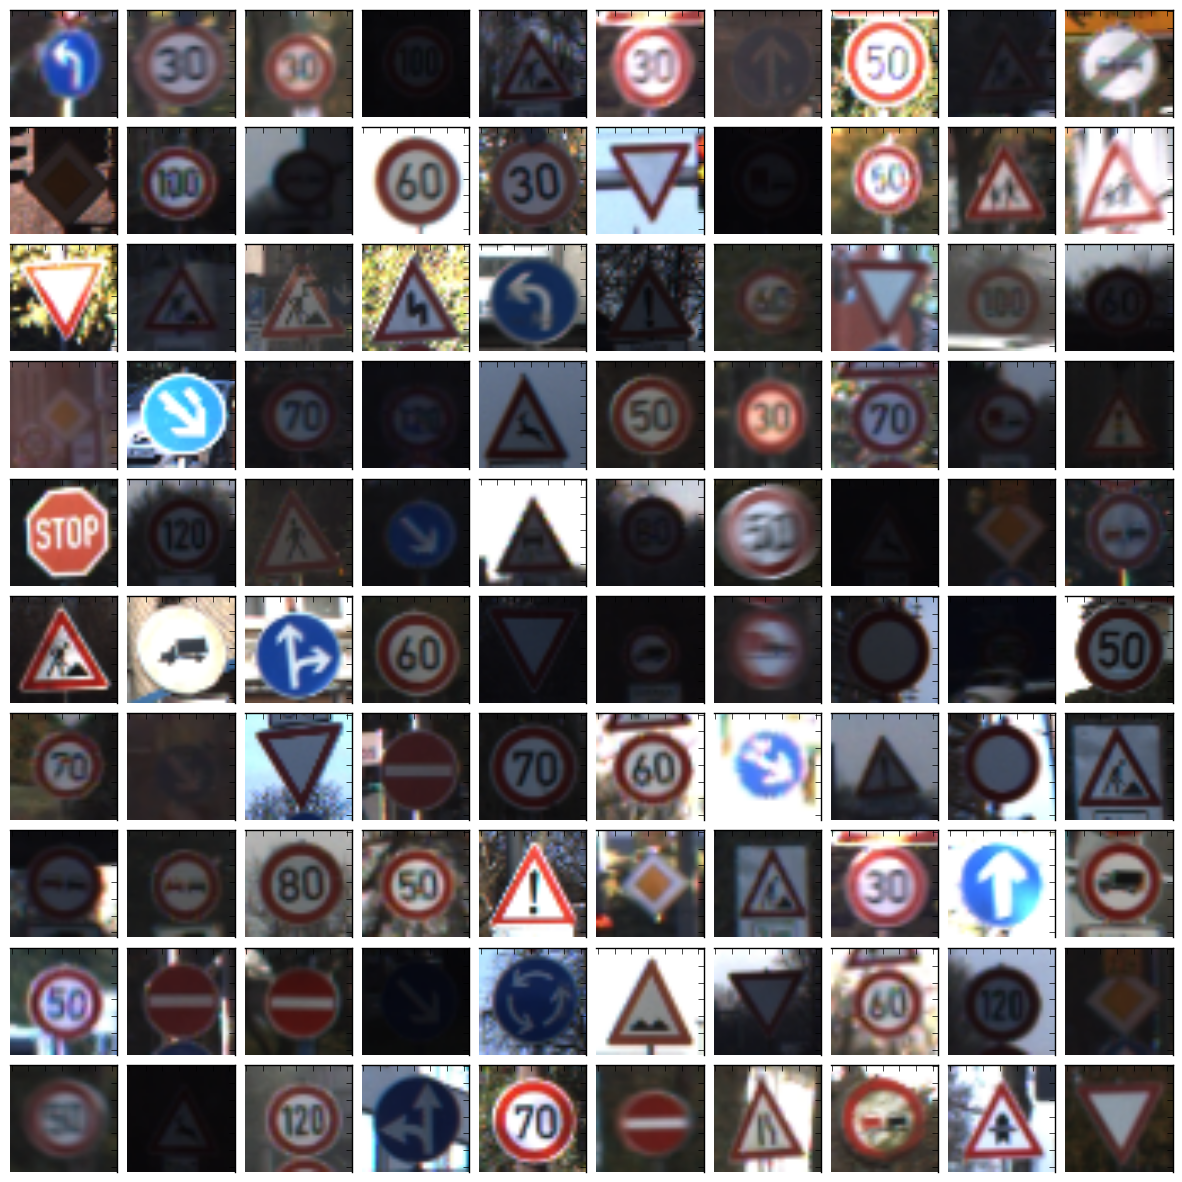

In [105]:
### Data visualization
def draw_sample(X=None , samples = 100):
    if X is not None:
        X_size = X.shape[0]
        mask = np.random.choice(X_size , samples ,replace = False)
        images = X[mask]
        fig = plt.figure(figsize = (15,15))
        grid = ImageGrid(fig, 111,
                         nrows_ncols = (int(np.sqrt(samples)+0.5), int(np.sqrt(samples)+0.5)),axes_pad=0.1)

        for i,img in enumerate(images):
            grid[i].imshow(img)
            grid[i].axis["left"].set_visible(False)
            grid[i].axis["bottom"].set_visible(False)
    
        plt.show()

        
draw_sample(X_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [42]:
#Data preprocessing 

X_train = np.reshape(X_train ,(X_train.shape[0],-1))
X_test  = np.reshape(X_test , (X_test.shape[0],-1))
mean = np.mean(X_train,axis = 0)
std = np.std(X_train,axis = 0) 
X_train = (X_train - mean) / std
mean = np.mean(X_test,axis = 0)
std = np.std(X_test,axis = 0)
X_test = (X_test - mean) / std

### Question 1 

_Describe the techniques used to preprocess the data._



**Answer:** The only preprocessing step is data standardization

In [43]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [44]:
### Data splitting.

validation_mask  = np.random.choice(n_train[0],int(0.2*n_train[0]),replace = False)
X_valid = X_train[validation_mask]
y_valid = y_train[validation_mask]
X_train = np.delete(X_train,validation_mask,0)
y_train = np.delete(y_train,validation_mask,0)
n_train = X_train.shape[0]
n_valid = X_valid.shape[0]
X_train.astype(float)
X_valid.astype(float)


print("Number of training examples =", X_train.shape)
print("Number of validation examples =", X_valid.shape)

Number of training examples = (31368, 3072)
Number of validation examples = (7841, 3072)


### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:** I randomly took 20% of the training data as my cross-validation set

In [45]:
### Define your architecture here.
### Feel free to use as many code cells as needed.


In [60]:
#deep neural network
def multiLayerNN(X , weights ,biases):
    n_layers = len(weights)
    activation = X
    for layer in range(n_layers-1):
        hidden = tf.add(tf.matmul(activation,weights[layer]),biases[layer])
        activation = tf.nn.relu(hidden)
    a = tf.add(tf.matmul(activation,weights[-1]),biases[-1])
    out = tf.nn.softmax(a)
    return out

features_size = X_train.shape[1]
labels_count = np.max(y_train) + 1

train_labels = np.zeros((n_train,labels_count))
train_labels[range(n_train) , y_train] = 1.0
valid_labels = np.zeros((n_valid,labels_count))
valid_labels[range(n_valid) , y_valid] = 1.0
test_labels = np.zeros((n_test[0],labels_count))
test_labels[range(n_test[0]) , y_test] = 1.0

#######################   Model  ############################
features = tf.placeholder(tf.float32)
labels = tf.placeholder(tf.float32)
train_feed_dict = {features : X_train , labels : train_labels}
valid_feed_dict = {features : X_valid , labels : valid_labels}
test_feed_dict = {features : X_test , labels: test_labels}
hidden_layer = [30]

weights = [#tf.Variable(tf.truncated_normal((features_size,hidden_layer[0]))),
           #tf.Variable(tf.truncated_normal((hidden_layer[0],hidden_layer[1]))),
           #tf.Variable(tf.truncated_normal((hidden_layer[1],hidden_layer[2]))),
           tf.Variable(tf.truncated_normal((features_size,labels_count)))
          ]
biases = [#tf.Variable(tf.zeros(hidden_layer[0])),
          #tf.Variable(tf.zeros(hidden_layer[1])),
          #tf.Variable(tf.zeros(hidden_layer[2])),
          tf.Variable(tf.zeros(labels_count))
          ]



### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [64]:
### Train your model here.
### Feel free to use as many code cells as needed.
predictions = multiLayerNN(features , weights , biases)
is_correct = tf.equal(tf.argmax(predictions,1) , tf.argmax(labels,1))
accuracy = tf.reduce_mean(tf.cast(is_correct,tf.float32))
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(predictions,labels)
regularization = 0
for i in range(len(weights)):
    regularization += tf.nn.l2_loss(weights[i])
reg = 1e-4
loss = tf.reduce_mean(cross_entropy) + reg*regularization

In [71]:
####################     Training            #############
learning_rate = 1e-3
momentum = 0.9
epochs = 50
batch_size = 100
batch_per_epoch = int(np.ceil(n_train/batch_size))
print_every = 5*batch_per_epoch
loss_history = []
training_acc_history =[]
validation_acc_history =[]
best_weights=[]

Solver = tf.train.AdamOptimizer(learning_rate,momentum).minimize(loss)
init = tf.initialize_all_variables()
with tf.Session() as session:
    session.run(init)
    iteration = 0   
    max_valid = 0
    
    for epoch in range(epochs):
        loss_hist = 0
        for batch in range(batch_per_epoch):
            mask = np.random.choice(n_train,batch_size,replace = False)
            batch_features = X_train[mask]
            batch_labels = train_labels[mask]
            _,loss_hist = session.run([Solver,loss],feed_dict = {features : batch_features, labels : batch_labels})
            loss_history.append(loss_hist)
            if not iteration % print_every:
                print("Iteration :",iteration,'loss:',loss_history[-1],sep=" ")
            iteration += 1

        #per epoch
        train_acc = session.run(accuracy , feed_dict = train_feed_dict)
        valid_acc = session.run(accuracy , feed_dict = valid_feed_dict)
        training_acc_history.append(train_acc)
        validation_acc_history.append(valid_acc)
        if(valid_acc > max_valid):
            max_valid = valid_acc
            best_weights = weights
            best_biases  = biases
        print("Epoch :",epoch,'Training acc:',train_acc,'Validation acc:',valid_acc,sep=" ")

    test_acc = session.run(accuracy , feed_dict = test_feed_dict)
    print('Test Accuracy:',test_acc,sep =' ')

        
        
            
        


    

Iteration : 0 loss: 8.9303
Epoch : 0 Training acc: 0.115532 Validation acc: 0.112613
Epoch : 1 Training acc: 0.157485 Validation acc: 0.153552
Epoch : 2 Training acc: 0.191469 Validation acc: 0.183523
Epoch : 3 Training acc: 0.24882 Validation acc: 0.242954
Epoch : 4 Training acc: 0.324311 Validation acc: 0.313225
Iteration : 1570 loss: 4.85563
Epoch : 5 Training acc: 0.369007 Validation acc: 0.364622
Epoch : 6 Training acc: 0.428717 Validation acc: 0.433618
Epoch : 7 Training acc: 0.469236 Validation acc: 0.466777
Epoch : 8 Training acc: 0.516163 Validation acc: 0.511414
Epoch : 9 Training acc: 0.537108 Validation acc: 0.529652
Iteration : 3140 loss: 3.93384
Epoch : 10 Training acc: 0.550051 Validation acc: 0.543171
Epoch : 11 Training acc: 0.573451 Validation acc: 0.565362
Epoch : 12 Training acc: 0.603577 Validation acc: 0.592399
Epoch : 13 Training acc: 0.604756 Validation acc: 0.593292
Epoch : 14 Training acc: 0.619453 Validation acc: 0.607065
Iteration : 4710 loss: 3.73854
Epoch 

0.32228


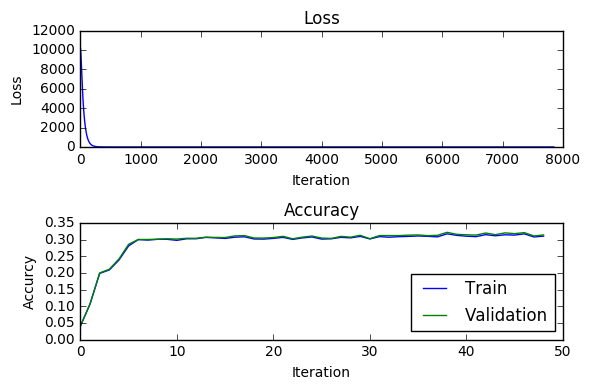

In [50]:
#Draw loss history
print(max_valid)
loss_plot = plt.subplot(2,1,1)
loss_plot.set_title('Loss')
loss_plot.plot(loss_history)
loss_plot.set_xlabel('Iteration')
loss_plot.set_ylabel('Loss')

acc_plot = plt.subplot(2,1,2)
acc_plot.set_title('Accuracy')
acc_plot.plot(training_acc_history, label ='Train')
acc_plot.plot(validation_acc_history, label ='Validation')
acc_plot.set_xlabel('Iteration')
acc_plot.set_ylabel('Accurcy')
plt.tight_layout()
acc_plot.legend(loc=4)
plt.show()


In [480]:
weights = best_weights
biases = best_biases
with tf.Session() as session:
    session.run(tf.initialize_all_variables())
    test_acc = session.run(accuracy , feed_dict = test_feed_dict)
    print(test_acc*100,'%',sep = ' ')

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_128' with dtype float
	 [[Node: Placeholder_128 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]

Caused by op 'Placeholder_128', defined at:
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-437-6d4192c12e48>", line 23, in <module>
    features = tf.placeholder(tf.float32)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1332, in placeholder
    name=name)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 1748, in _placeholder
    name=name)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 749, in apply_op
    op_def=op_def)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2380, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/Haithamkhedr/anaconda/envs/CarND-TensorFlow-Lab/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1298, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'Placeholder_128' with dtype float
	 [[Node: Placeholder_128 = Placeholder[dtype=DT_FLOAT, shape=[], _device="/job:localhost/replica:0/task:0/cpu:0"]()]]


##### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [ ]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.